In [4]:
import pandas as pd 
import numpy as np 
import rasterio 
from tqdm import tqdm
import os
#from create_dataset.preprocessing import NDVIPreprocessing

In [5]:
LIST_FOLDER =  ['dakya_gialai','haiduong','hue','hungson_processing','huy_longan',
                'kienxuong_thaibinh','kimson_ninhbinh','longmy_haugiang','namdinh']

ROOT_PATH = 'assets/img/'

# Sentinel 2 NDVI 

In [30]:
for file_name in os.listdir(f'{ROOT_PATH}{LIST_FOLDER[0]}/S2L2A'):
    date_start = file_name.split('_')[0]
    date_end = file_name.split('.')[0].split('_')[1]
    print(date_start)
    print(date_end)
    break

2020-01-01
2020-01-08


In [ ]:
# Kiểm tra dữ liệu ngoại lai 
def check_outliers(list_ndvi):
    alpha = beta = 0.15
    gamma = -0.05
    for t in range(1, len(list_ndvi)-1):
        if list_ndvi[t-1] is None:
            continue
        if list_ndvi[t-1] is not None and list_ndvi[t] is not None and list_ndvi[t+1] is not None:
            c_alpha = np.abs(list_ndvi[t] - list_ndvi[t-1])
            c_beta = np.abs(list_ndvi[t+1] - list_ndvi[t])
            c_gamma = np.abs(list_ndvi[t+1] - list_ndvi[t-1])
            print(f"a = {c_alpha},  b = {c_beta}, g = {c_gamma}")
            if c_alpha >= alpha and c_beta >= beta and c_gamma >= gamma:
                list_ndvi[t] = None
    return list_ndvi

test_list = [0.6, 0.55, 0.1, 0.48, 0.4, 0]
test_list = check_outliers(test_list)
print(test_list)


In [52]:
hue_arr = np.load('D:/Streamlit/api/assets/np/namdinh.npy')

In [69]:
hue_arr

array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[0.02589223, 0.03822099, 0.09625668, ..., 0.21257485,
         0.21515152, 0.24255952],
        [0.05775922, 0.07942974, 0.11791531, ..., 0.26284658,
         0.29304696, 0.28786212],
        [0.08230453, 0.08220065, 0.08931918, ..., 0.29560685,
         0.31567329, 0.30566877],
        ...,
        [       nan,        nan,        nan, ..., 0.21674877,
         0.22050649, 0.21014493],
        [   

In [78]:
arr_full = []
for name in LIST_FOLDER:
    arr = np.load(f'D:/Streamlit/api/assets/np/{name}.npy')
    arr_ratio = []
    for i in tqdm(range(arr.shape[0])):
        num_nan = np.isnan(arr[i]).sum()

        # Tính tổng số lượng phần tử trong mảng
        total_elements = arr.shape[1] * arr.shape[2]
        arr_ratio.append(float(num_nan/total_elements) * 100)
    arr_full.append(arr_ratio)

  0%|          | 0/209 [00:00<?, ?it/s]

100%|██████████| 209/209 [00:00<00:00, 12325.43it/s]


In [79]:
arr_full[0]

[0.23858214042263123,
 0.0,
 0.0,
 84.79890933878664,
 0.0,
 0.0,
 0.0,
 8.14019541013406,
 0.0,
 2.7323335605544194,
 0.0,
 0.0,
 0.0,
 100.0,
 0.0,
 0.0,
 100.0,
 0.0,
 0.022722108611679163,
 49.074074074074076,
 99.84094523971825,
 11.90070438536696,
 23.108384458077712,
 88.28107248352647,
 53.44807998182232,
 100.0,
 0.0681663258350375,
 94.18882072256305,
 1.0793001590547602,
 75.24994319472847,
 100.0,
 100.0,
 9.128607134742104,
 14.360372642581233,
 96.13156100886162,
 7.503976369007044,
 40.51351965462395,
 100.0,
 100.0,
 99.53419677346058,
 100.0,
 3.5787321063394684,
 6.8847989093387865,
 100.0,
 84.08884344467167,
 0.0,
 0.0,
 100.0,
 0.0,
 0.5453306066803,
 1.687116564417178,
 0.0,
 69.18314019541013,
 0.0,
 31.27698250397637,
 0.0,
 0.04544421722335833,
 0.0,
 0.0,
 0.0,
 99.70461258804816,
 0.0,
 0.0,
 97.22790274937513,
 0.0,
 1.3746875710065893,
 0.0,
 18.842308566234948,
 100.0,
 5.16927970915701,
 52.61304249034311,
 0.0681663258350375,
 68.50147693705976,
 88.6219

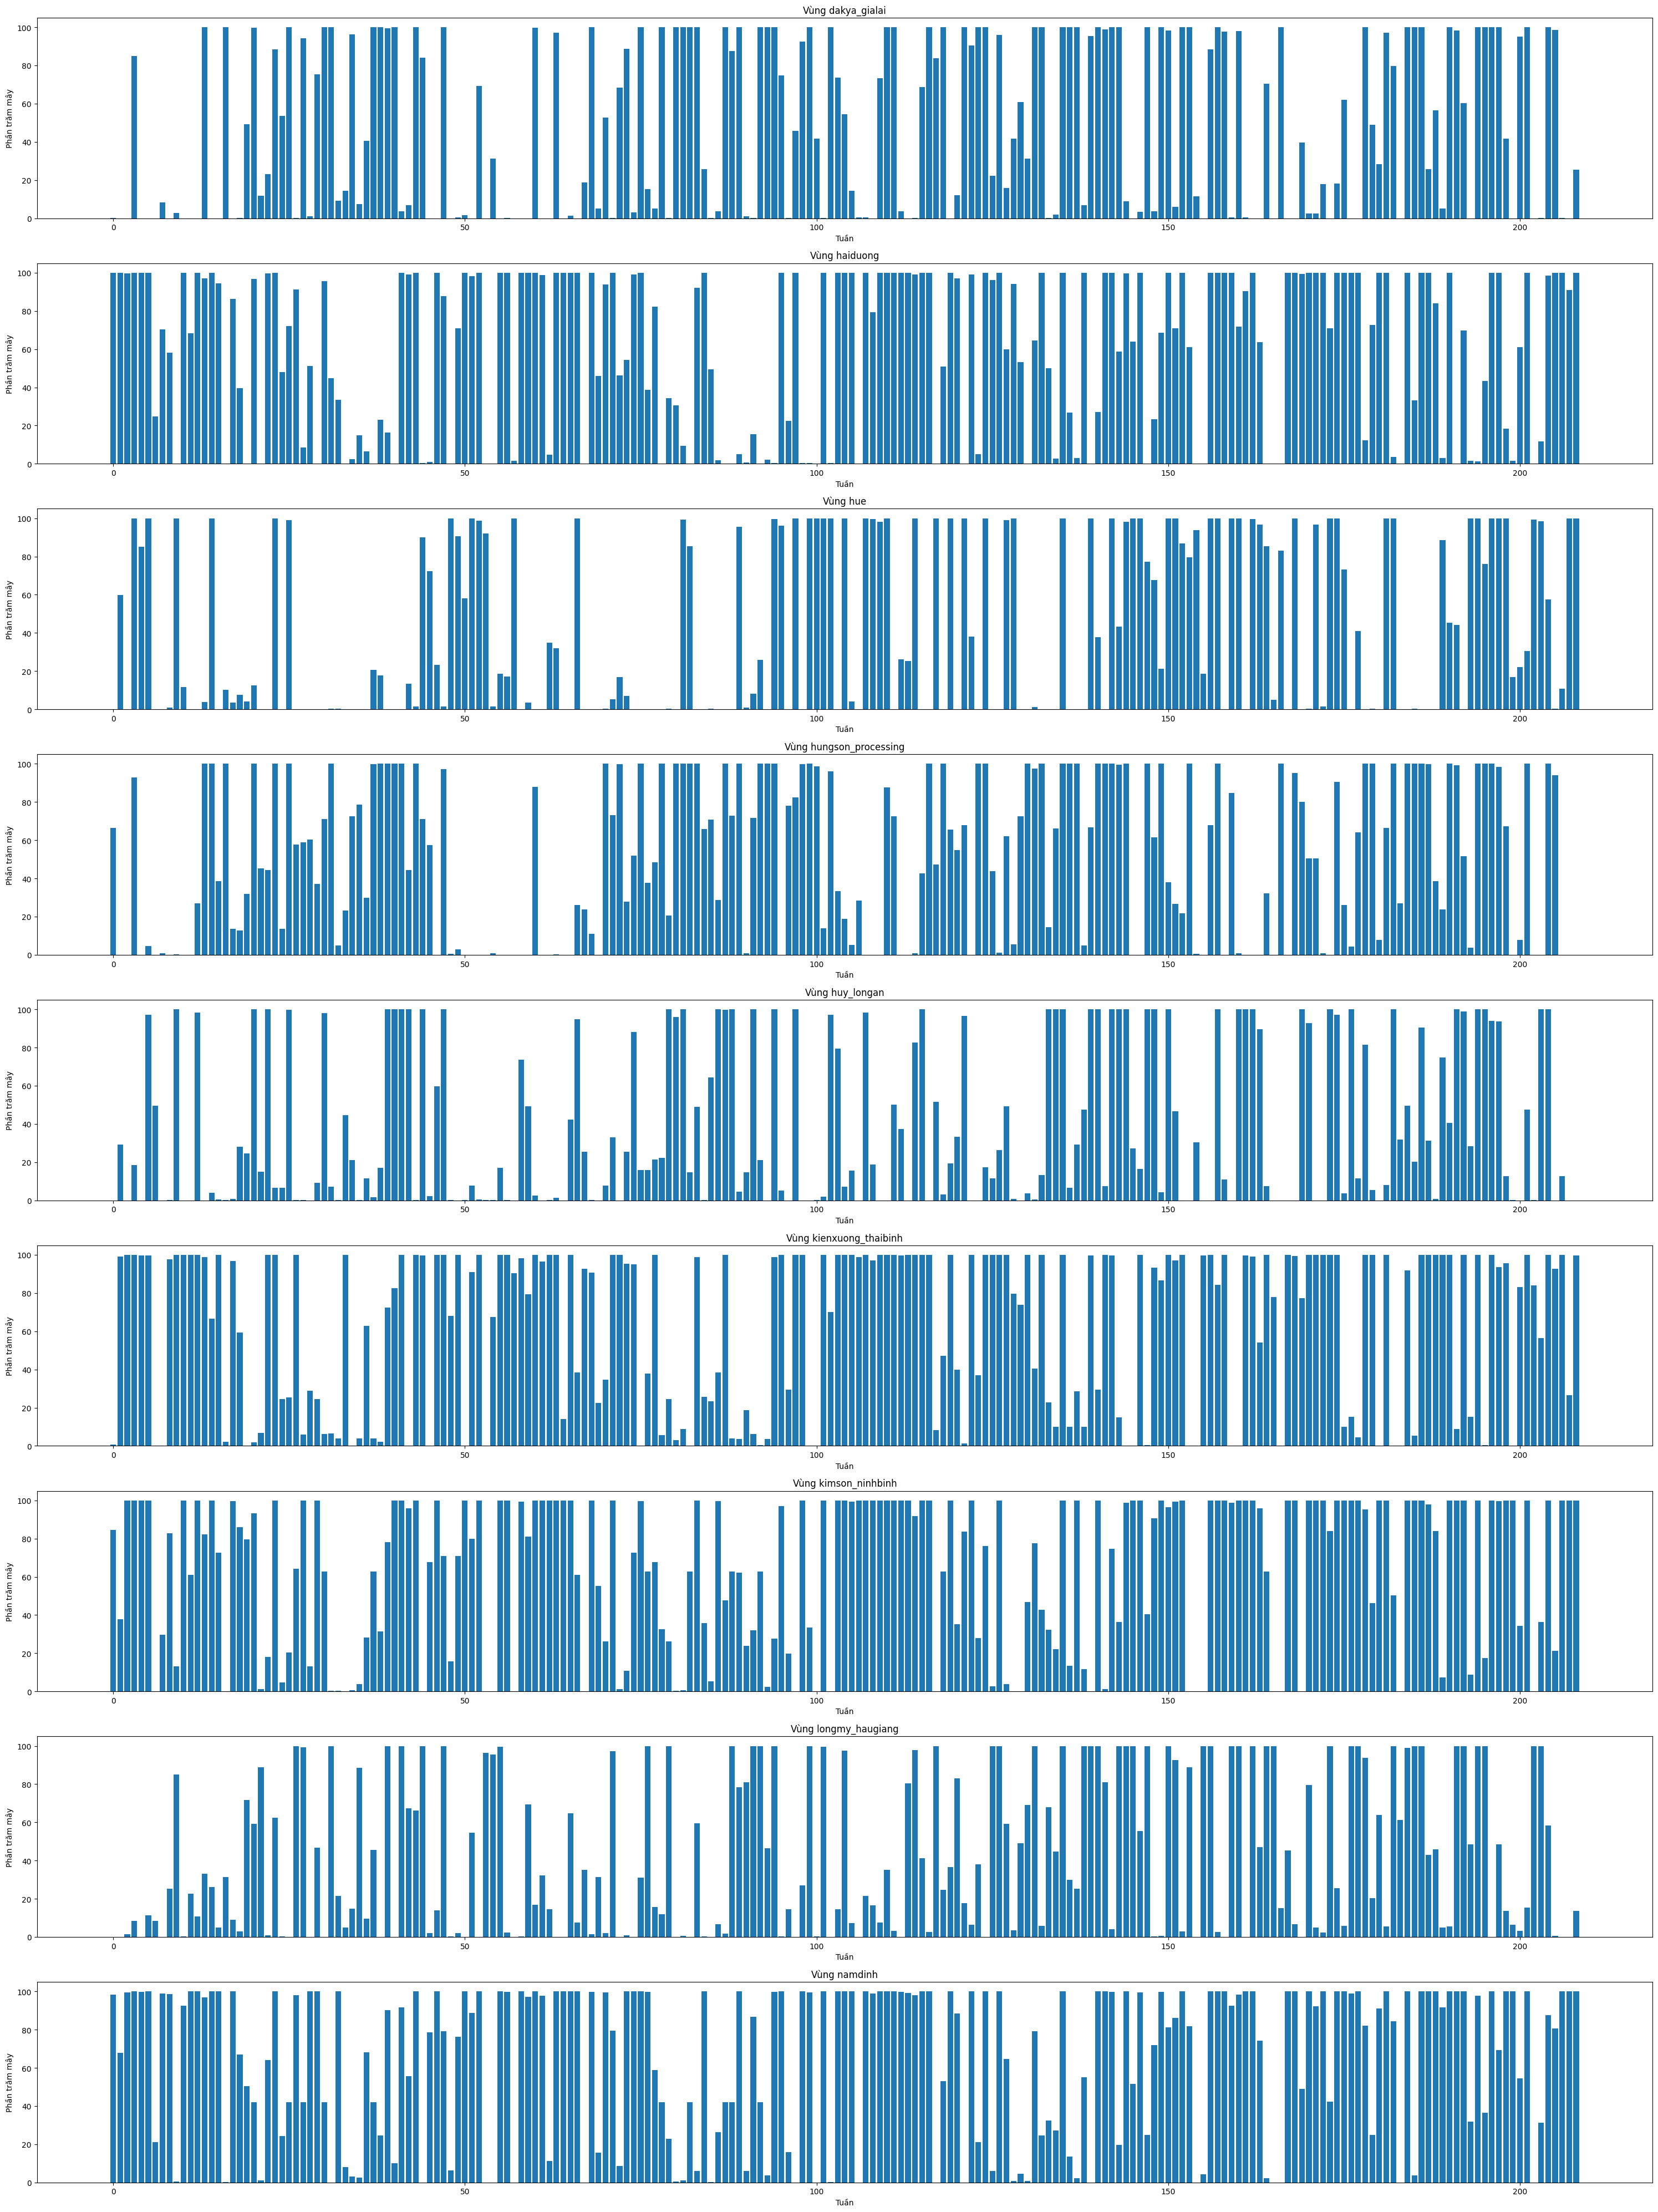

In [89]:
import matplotlib.pyplot as plt
import numpy as np

# Dữ liệu ví dụ cho 9 biểu đồ cột
data =  arr_full # 9 bộ dữ liệu, mỗi bộ có 5 giá trị

# Tạo figure và lưới các subplots 3x3
fig, axes = plt.subplots(9, 1, figsize=(30, 40))

# Duyệt qua các axes và vẽ biểu đồ cột
for i, ax in enumerate(axes.flat):
    ax.bar(range(len(data[i])), data[i])
    ax.set_title(f'Vùng {LIST_FOLDER[i]}')
    ax.set_xlabel('Tuần')
    ax.set_ylabel('Phần trăm mây')

# Tự động căn chỉnh layout để tránh bị trùng lặp nội dung
plt.tight_layout()
plt.show()

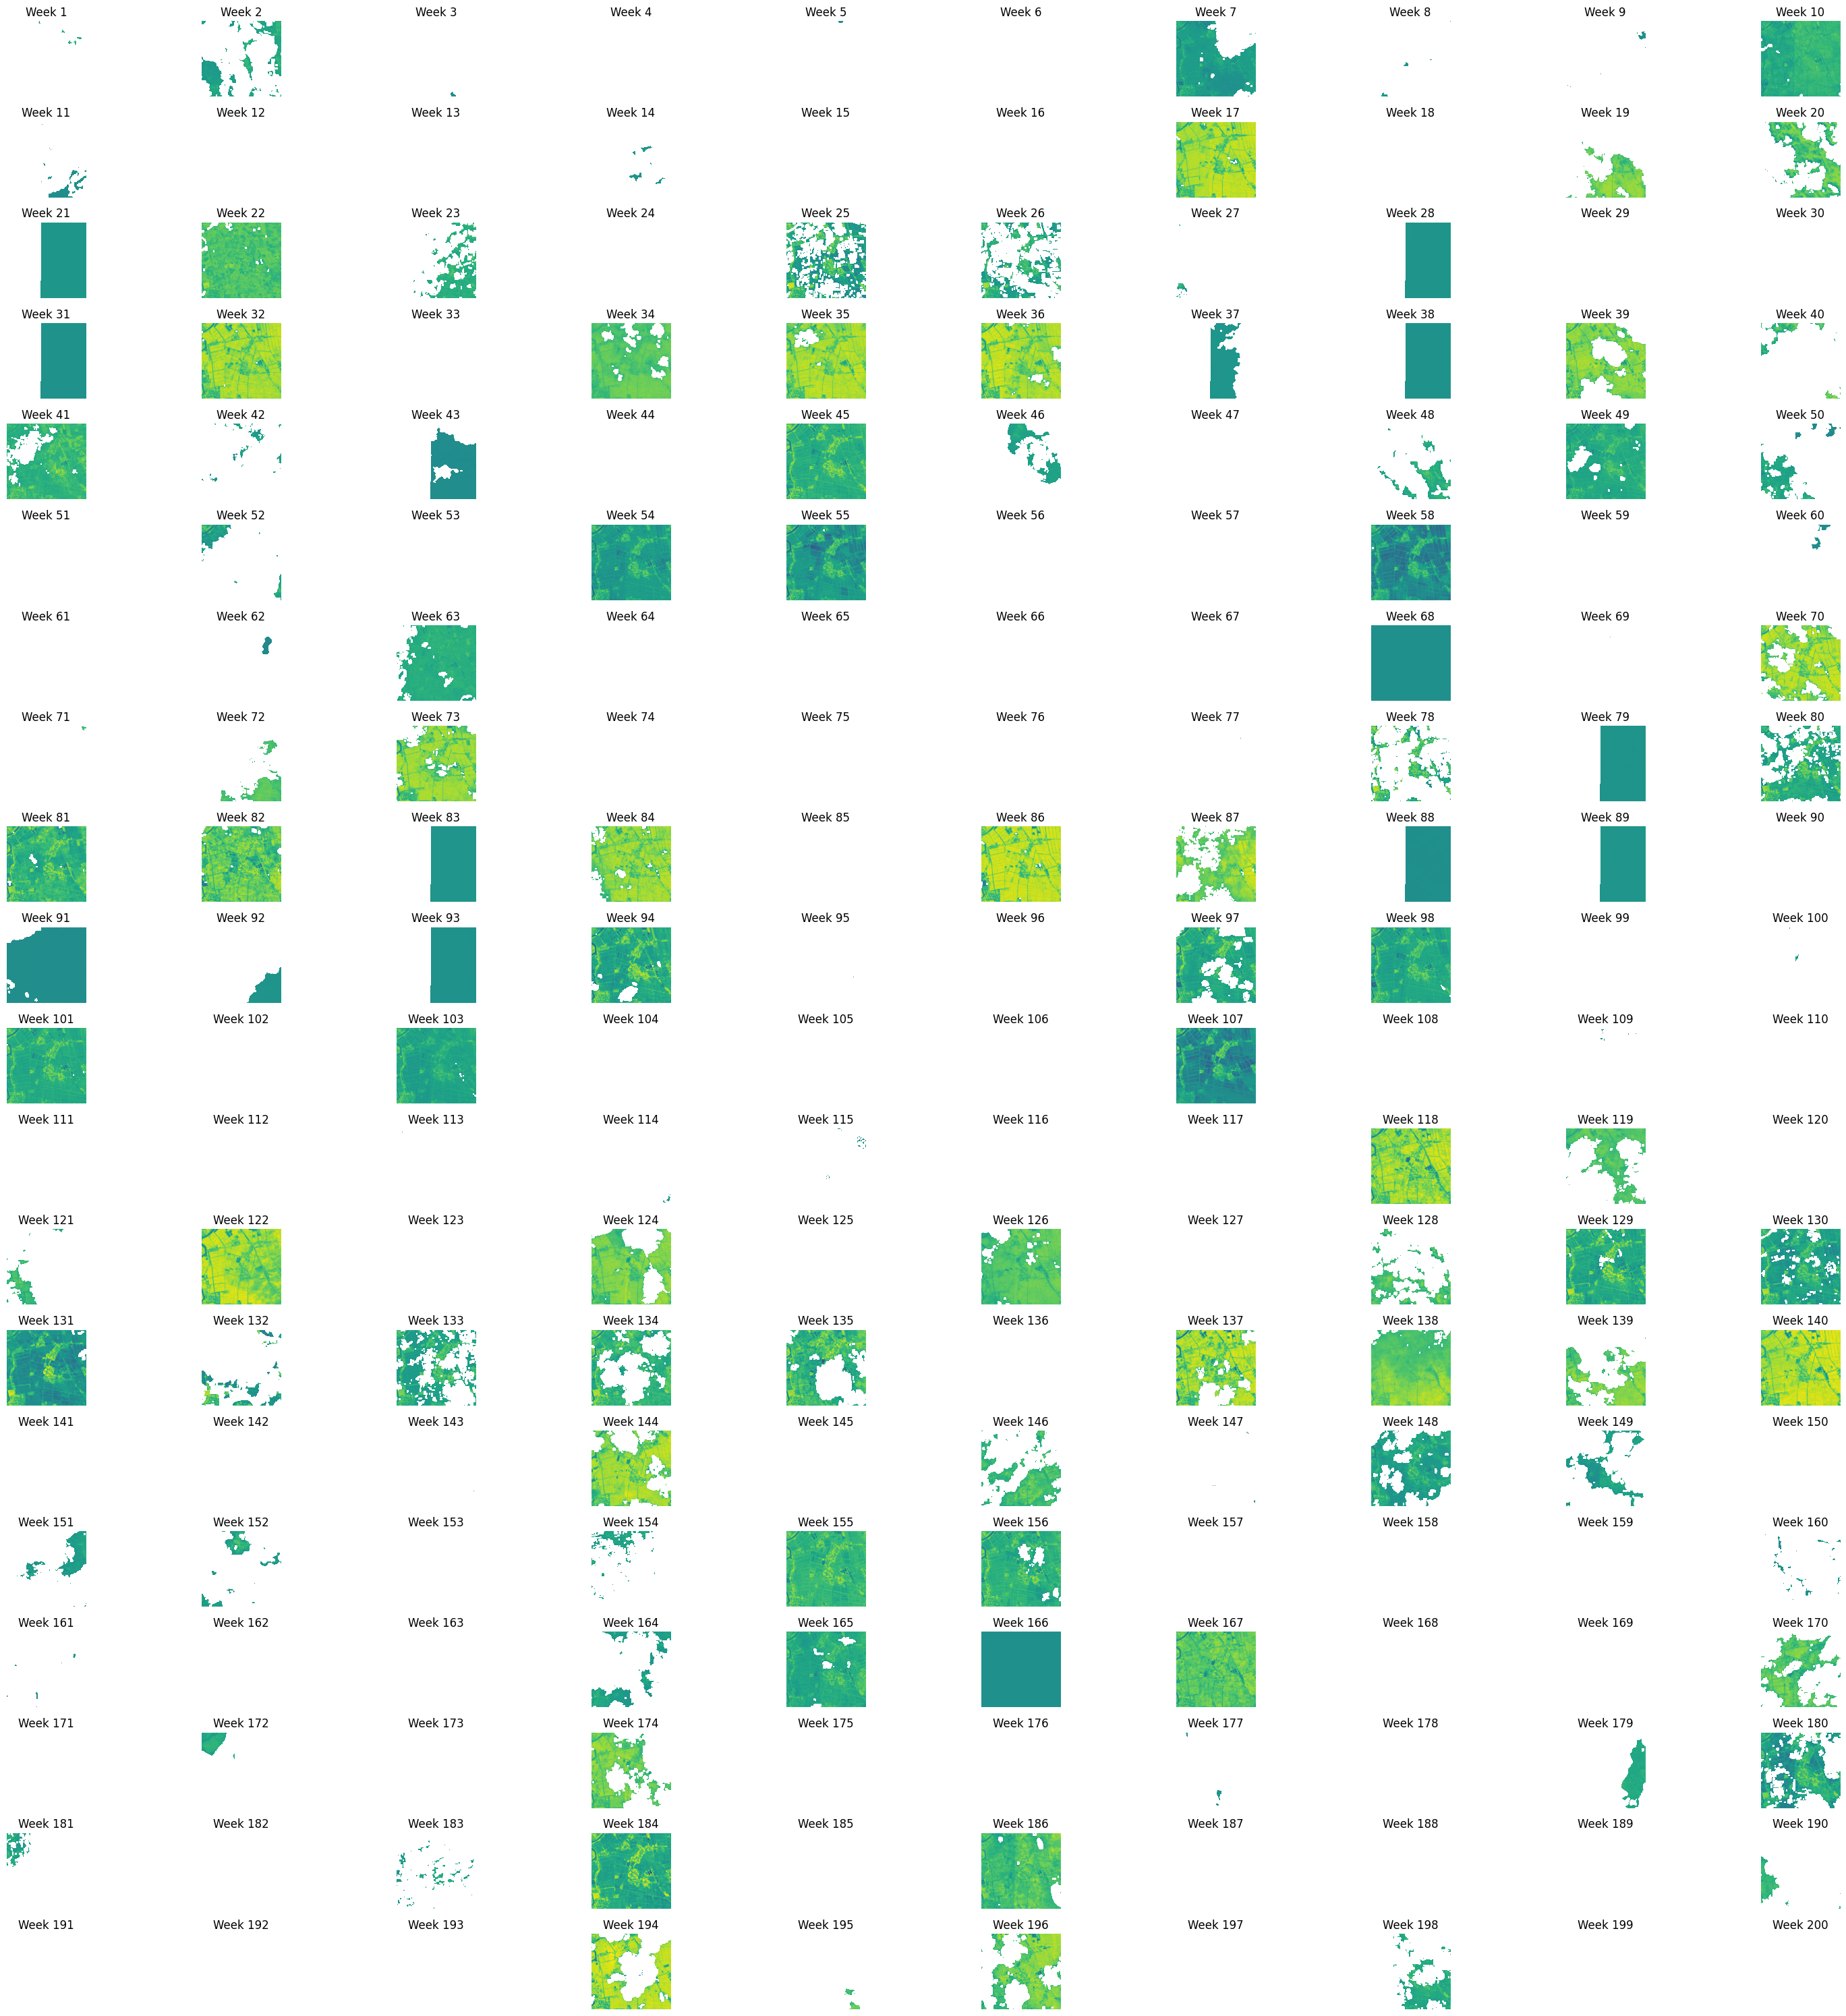

In [53]:
# Vẽ mảng 2D dưới dạng hình ảnh
import matplotlib.pyplot as plt 

# Tạo bảng 2x5 để hiển thị 10 ảnh
fig, axs = plt.subplots(20, 10, figsize=(30, 30))

# Vẽ từng ảnh trong bảng
for i, ax in enumerate(axs.flat):
    ax.imshow(hue_arr[i,:,:], cmap='viridis', vmax=1, vmin=-1)  # Hiển thị ảnh với thang độ xám
    ax.set_title(f'Week {i+1}')
    ax.axis('off')  # Ẩn các trục

# Thêm khoảng cách giữa các ô
plt.tight_layout()
plt.show()

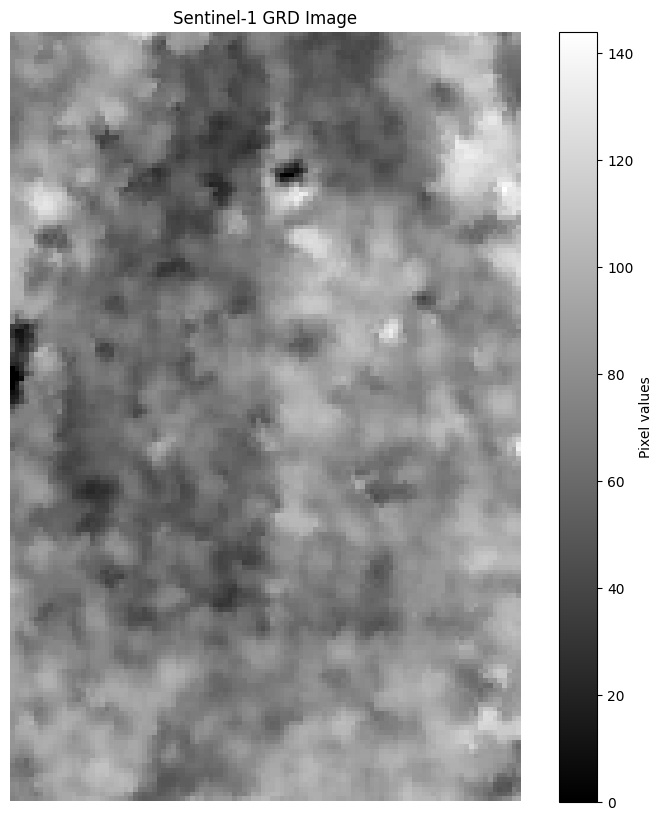

In [55]:
import rasterio
import matplotlib.pyplot as plt

# Đường dẫn tới file Sentinel-1 GRD (.tif)
file_path = 'D:/Streamlit/api/assets/img/dakya_gialai/S1GRD/2020-01-01_2020-01-08.tif'

# Mở file raster bằng rasterio
with rasterio.open(file_path) as src:
    # Đọc dữ liệu từ band đầu tiên (ví dụ: VV hoặc VH)
    raster_data = src.read(2)  # Bạn có thể thay đổi chỉ số band nếu cần

    # Hiển thị dữ liệu raster
    plt.figure(figsize=(10, 10))
    plt.imshow(raster_data, cmap='gray')  # Hiển thị ảnh với thang độ xám
    plt.colorbar(label='Pixel values')
    plt.title('Sentinel-1 GRD Image')
    plt.axis('off')  # Ẩn trục để hiển thị hình ảnh rõ hơn
    plt.show()
